In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np
import pandas as pd
os.chdir('/Users/armandayuu/Desktop/dea/')
from scipy import stats
import math

In [31]:
#导入数据
data = pd.read_csv("111.csv",header = 0,index_col = 0)
data.head()

,lung3,lung1,R01-003,R01-004,R01-005,R01-006,R01-007,R01-012
A2M,932.0,927.0,38.874700,33.093100,19.039620,40.884600,21.19262,94.186200
AAAS,10.0,10.0,4.490230,5.000240,6.074440,3.946230,4.94569,5.522400
AAGAB,10.0,10.0,12.403300,4.874040,4.248798,4.441260,9.12071,7.719990
AAK1,2.0,2.0,13.122151,16.125429,23.051753,4.954714,34.65827,13.186176
AAMP,24.0,25.0,20.896500,10.979000,7.113910,18.378200,13.88510,27.649800


In [40]:
print(data['R01-003'].median())
print(data['R01-004'].median())
print(data['R01-005'].median())
print(data['R01-006'].median())
print(data['R01-007'].median())
print(data['R01-012'].median())
print(data['lung1'].median())
print(data['lung3'].median())
print("---------------------------------")
print(data['R01-003'].var())
print(data['R01-004'].var())
print(data['R01-005'].var())
print(data['R01-006'].var())
print(data['R01-007'].var())
print(data['R01-012'].var())
print(data['lung1'].var())
print(data['lung3'].var())

13.08489
12.9282
8.69007
12.7601
16.63936
12.2828
11.0
11.0
---------------------------------
267610.46322121157
614630.3960249887
79478834623.23857
57869101196.407936
17555789525827.55
427595.54506375664
3935.372826540641
3932.4311326792877


In [35]:
# 查看数据维度
# Check the dimension of the loaded data (rows & columns)
print(data.shape)
# Number of rows
number_of_genes = len(data.index)
print(number_of_genes)

(5053, 8)
5053


In [42]:
data2 = np.log2(data)
print(data2['R01-003'].mean())
print(data2['R01-004'].mean())
print(data2['lung1'].mean())
print(data2['lung3'].mean())
print(data2['R01-003'].var())
print(data2['R01-004'].var())
print(data2['lung1'].var())
print(data2['lung3'].var())

3.845632744826325
3.8387501444661525
3.4995049505452513
3.4983388134599056
2.3656145598884377
2.2062980732100197
2.167641273860224
2.1677768149958085


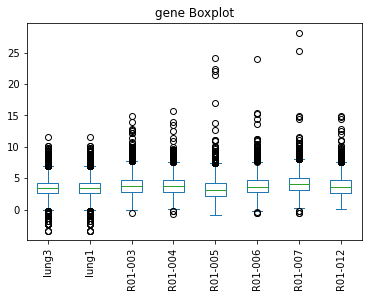

In [37]:
# Boxplot of each microarray
plt.show(data2.plot(kind = 'box', title = 'gene Boxplot', rot = 90))

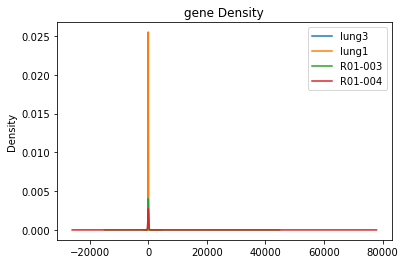

In [30]:
# Density
plt.show(data.plot(kind = 'density', title = 'gene Density'))

In [5]:
#差异分析
# The mean of expression of the tumor samples for each gene (row)
wt = data.loc[:, 'R01-003':'R01-146'].mean(axis = 1)
wt.head()

A2M      97.642279
AAAS      5.154288
AAGAB    11.490725
AAK1     33.821561
AAMP     12.691777
dtype: float64

In [6]:
# The mean of expression of the normal samples for each gene (row)
ko = data.loc[:,'lung3' : 'lung1'].mean(axis = 1)
ko.head()

A2M      929.5
AAAS      10.0
AAGAB     10.0
AAK1       2.0
AAMP      24.5
dtype: float64

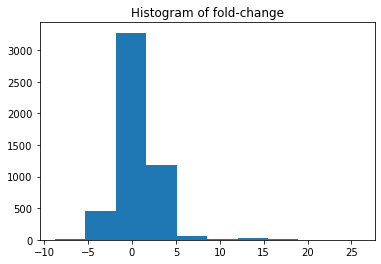

In [7]:
# 查看基因差异的差异倍数fold分布
fold = wt / ko
foldchange = np.log2(fold)
#print(foldchange)
# Histogram of the fold-change
plt.hist(foldchange)
plt.title("Histogram of fold-change")
plt.show()

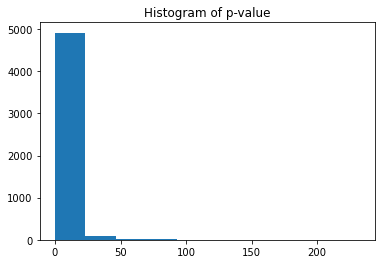

In [8]:
#查看基因差异的P值分布
from scipy import stats

pvalue = []
for i in range(0, number_of_genes):
    ttest = stats.ttest_ind(data.iloc[i,0:2], data.iloc[i,3:])
    pvalue.append(ttest[1])

# Histogram of the p-values
plt.hist(-np.log10(pvalue))
#print(-np.log10(pvalue))
plt.title("Histogram of p-value")
plt.show()

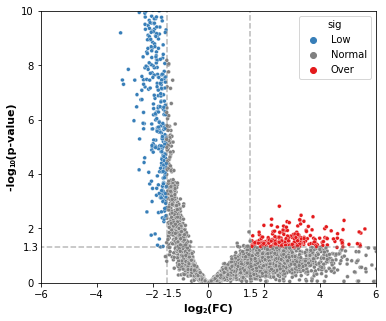

In [14]:
#火山图
myarray = np.asarray(pvalue)
result = pd.DataFrame({'pvalue':myarray,'FoldChange':foldchange})
result['log(pvalue)'] = -np.log10(result['pvalue'])
result['sig'] = 'Normal'
result['size']  =np.abs(result['FoldChange'])/10

result.loc[(result.FoldChange> 1.5 )&(result.pvalue < 0.05),'sig'] = 'Over'
result.loc[(result.FoldChange< -1.5 )&(result.pvalue < 0.05),'sig'] = 'Low'
plt.figure(figsize=(6,5))
ax = sns.scatterplot(x="FoldChange", y="log(pvalue)",
                     hue_order = ('Low','Normal','Over'), hue='sig',
                     palette=("#377EB8","grey","#E41A1C"), s=15,
                     data=result)
ax.axis([-6,6,0,10])
ax.axvline(1.5, 0,10,linestyle="--",alpha=0.55,color='grey')
ax.axvline(-1.5, 0,10,linestyle="--",alpha=0.55,color='grey')
ax.axhline(1.3, -1,6,linestyle="--", alpha=0.55,color='grey')
#ax.text(-6,10.1,"Low Expression <--")
#ax.text(2.9,10.1,"--> Over Expression")
ax.text(-1.63,-0.527,"-1.5")
ax.text(1.23,-0.527,"1.5")
ax.text(-6.65,1.18,"1.3")
ax.text(-7.1,4.3,"10",fontweight='bold',fontsize=6.5,rotation=90)
ax.text(-0.2,-1.1,"2",fontweight='bold',fontsize=6.5)
#ax.annotate('HOPX',
 #           xy=(-1.6, 3.6922), xycoords='data',
  #          xytext=(0.5,0.5), textcoords='axes fraction',
   #         arrowprops=dict(facecolor='black', shrink=0.05),
    #        horizontalalignment='right', verticalalignment='top')
ax.set_ylabel('-log  (p-value)',fontweight='bold',fontsize=11)
ax.set_xlabel('log (FC)',fontweight='bold',fontsize=11)
#ax.set_title('Volcano Plot of DEA',y=1,fontweight='bold',fontsize=15)
ax.figure.savefig('/Users/armandayuu/Desktop/dea.png',dpi=800,bbox_inches='tight')

In [90]:
#筛选差异基因
fold_cutoff = -1.5
pvalue_cutoff = 0.05

filtered_ids = []
for i in range(0, number_of_genes):
    if (abs(fold[i]) >= fold_cutoff) and (pvalue[i] <= pvalue_cutoff):
        filtered_ids.append(i)
        
filtered = data.iloc[filtered_ids,:]
print("Number of DE genes: ")
print(len(filtered.index))

filtered.head(60)


Number of DE genes: 
1290


,lung3,lung1,R01-003,R01-004,R01-005,R01-006,R01-007,R01-012,R01-013,R01-014,...,R01-136,R01-137,R01-138,R01-139,R01-140,R01-141,R01-142,R01-144,R01-145,R01-146
A2M,932.0,927.0,38.874700,33.093100,19.039620,40.884600,21.192620,94.186200,44.019700,123.571000,...,301.089000,222.705000,23.738900,169.170000,35.079200,142.104000,233.773000,153.046000,192.524000,58.205800
AAAS,10.0,10.0,4.490230,5.000240,6.074440,3.946230,4.945690,5.522400,3.664320,3.780440,...,5.729040,7.026140,4.745380,10.188200,10.192000,5.729540,4.612380,4.758820,4.587660,5.772440
AAK1,2.0,2.0,13.122151,16.125429,23.051753,4.954714,34.658270,13.186176,38.744560,21.738306,...,56.255418,41.272437,21.362064,22.363800,9.652926,21.800506,43.362620,21.224142,43.426958,22.324451
AAMP,24.0,25.0,20.896500,10.979000,7.113910,18.378200,13.885100,27.649800,7.584100,15.257800,...,7.988400,13.805100,17.386200,12.829800,17.880500,7.116630,11.016000,13.970000,10.959200,23.526900
ABCF3,11.0,11.0,15.922300,13.470400,4.288210,7.415293,5.916380,5.943360,5.509780,7.413330,...,2.666440,7.144510,3.828070,5.355390,7.725450,5.095040,3.829420,3.485650,10.457955,7.604460
ABCG1,14.0,13.0,8.938842,3.023930,4.038880,8.183666,4.037990,3.985900,4.660602,2.540110,...,5.257580,10.624485,8.022700,8.165687,9.917240,5.036339,10.495480,4.132398,5.449898,13.558200
ABHD2,31.0,32.0,8.318040,4.046650,7.420180,11.364900,8.207810,9.592610,5.089090,2.963010,...,2.508030,8.919800,4.375100,7.338850,7.366070,3.395900,3.566960,1.400520,3.418710,12.518600
ABI1,23.0,23.0,2.338860,4.265293,3.461768,5.865167,3.805745,6.264330,4.721986,7.062925,...,7.674970,10.240924,8.862209,5.897850,3.048980,5.059957,5.617814,17.847910,7.090401,2.745870
ABI2,5.0,4.0,14.379620,18.291410,12.828365,18.513908,19.896670,15.900306,17.105690,46.411485,...,22.365234,12.886100,15.924930,61.112910,23.453380,24.180911,14.606060,36.468630,11.372300,29.328920
ACADVL,67.0,66.0,18.498300,9.546089,11.238746,16.129000,21.454700,7.463820,7.605736,14.367430,...,23.727910,8.197870,8.530320,8.109030,75.060350,38.151840,4.797560,5.864160,6.586790,45.209600
